In [62]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

dfWell = pd.read_csv('wellness.csv')
dfWell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           4995 non-null object
Nutrition              4174 non-null object
NutritionAdjustment    4266 non-null object
USGMeasurement         4843 non-null object
USG                    629 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ K

In [63]:
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [64]:
dfWell.Menstruation.value_counts()

No     4285
Yes     710
Name: Menstruation, dtype: int64

In [65]:
dfWell.Nutrition.value_counts()

Excellent    2713
Okay         1398
Poor           63
Name: Nutrition, dtype: int64

In [66]:
dfWell.NutritionAdjustment.value_counts()

Yes             3727
No               439
I Don't Know     100
Name: NutritionAdjustment, dtype: int64

In [67]:
# As Menstruation, Nutrition and Nutrition Adjustment are categorical, fill NA with their Modes
dfWell.Menstruation.fillna(dfWell.Menstruation.mode()[0],inplace=True)
dfWell.Nutrition.fillna(dfWell.Nutrition.mode()[0],inplace=True)
dfWell.NutritionAdjustment.fillna(dfWell.NutritionAdjustment.mode()[0],inplace=True)
dfWell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           5011 non-null object
Nutrition              5011 non-null object
NutritionAdjustment    5011 non-null object
USGMeasurement         4843 non-null object
USG                    629 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ K

In [68]:
dfWell.Menstruation.value_counts()

No     4301
Yes     710
Name: Menstruation, dtype: int64

In [69]:
dfWell.Nutrition.value_counts()

Excellent    3550
Okay         1398
Poor           63
Name: Nutrition, dtype: int64

In [70]:
dfWell.NutritionAdjustment.value_counts()

Yes             4472
No               439
I Don't Know     100
Name: NutritionAdjustment, dtype: int64

In [71]:
# As USG measurement has almost 87% NA, it doesn't make sense to fill NA with random or mean values. 
# Hence, drop USG related columns
dfWell = dfWell.drop(['USGMeasurement', 'USG'], axis=1)
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,Excellent,Yes,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,Excellent,Yes,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,100%


In [72]:
# We do not require Bed Time and Wake Time as well. We'll be using SleepHours instead
dfWell = dfWell.drop(['BedTime', 'WakeTime'], axis=1)
# Convert TrainingReadiness from String to fraction
dfWell['TrainingReadiness'] = dfWell['TrainingReadiness'].str.rstrip('%').astype('float') / 100.0

In [73]:
dfWell.Pain.value_counts()

No     4423
Yes     588
Name: Pain, dtype: int64

In [74]:
dfWell.Illness.value_counts()

No              4456
Slightly Off     421
Yes              134
Name: Illness, dtype: int64

In [75]:
# Convert into numerical values
dfWell.Pain = np.where(dfWell.Pain == 'No', 0, 1)
dfWell.Menstruation = np.where(dfWell.Menstruation == 'No', 0, 1)
dfWell.Nutrition = np.where(dfWell.Nutrition == 'Poor', 0, np.where(dfWell.Nutrition == 'Okay', 1, 2))
dfWell.Illness = np.where(dfWell.Illness == 'Yes', 0, np.where(dfWell.Illness == 'Slightly Off', 1, 2))
dfWell.NutritionAdjustment = np.where(dfWell.NutritionAdjustment == 'No', 0, \
                                      np.where(dfWell.NutritionAdjustment == 'I Don\'t Know', 1, 2))
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,8.00,2,13,0,2,1,2,2,0.00
1,2018-07-21,2,4,3,4,4,8.00,4,19,1,2,1,2,2,0.00
2,2018-07-21,3,3,3,5,4,8.00,4,19,0,2,0,2,2,1.00
3,2018-07-21,4,2,3,5,4,6.50,1,15,0,2,1,2,2,0.95
4,2018-07-21,5,5,3,4,4,7.25,4,20,0,2,0,1,2,1.00


In [76]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
df = dfWell[dfWell.columns.difference(['Date','PlayerID'])]
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 13 columns):
Desire                 5011 non-null int64
Fatigue                5011 non-null int64
Illness                5011 non-null int32
Irritability           5011 non-null int64
Menstruation           5011 non-null int32
MonitoringScore        5011 non-null int64
Nutrition              5011 non-null int32
NutritionAdjustment    5011 non-null int32
Pain                   5011 non-null int32
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
Soreness               5011 non-null int64
TrainingReadiness      5011 non-null float64
dtypes: float64(2), int32(5), int64(6)
memory usage: 411.2 KB


In [78]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

nan

In [79]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 3.84911617e+00,  1.55347906e+00,  1.16588898e+00,  1.08331613e+00,
        9.90414965e-01,  9.59876750e-01,  8.85139749e-01,  6.63808832e-01,
        5.70452410e-01,  5.00349995e-01,  4.45393521e-01,  3.32763437e-01,
       -8.64217552e-16])

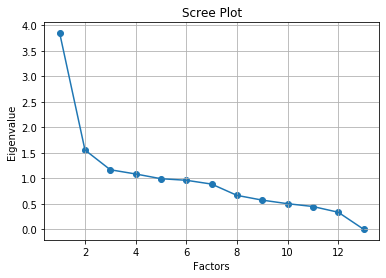

In [80]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [81]:
fa.get_factor_variance()

(array([3.08441704, 1.1774521 , 0.82185482]),
 array([0.23726285, 0.09057324, 0.0632196 ]),
 array([0.23726285, 0.32783609, 0.39105569]))

In [61]:
# Time Series Analysis
def player_ema(PlayerID, span=7):
    feature_ema = PlayerID.rolling(window=span, min_periods=span).mean()[:span]
    rest = PlayerID[span:]
    return pd.concat([feature_ema, rest]).ewm(span=span, adjust=False).mean()

# dfWell.groupby('PlayerID').apply(player_ema)
# dfWell.head()

C:\Users\sangh\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,8.00,2,13,0,2,1,2,2,0.00
1,2018-07-21,2,4,3,4,4,8.00,4,19,1,2,1,2,2,0.00
2,2018-07-21,3,3,3,5,4,8.00,4,19,0,2,0,2,2,1.00
3,2018-07-21,4,2,3,5,4,6.50,1,15,0,2,1,2,2,0.95
4,2018-07-21,5,5,3,4,4,7.25,4,20,0,2,0,1,2,1.00


In [84]:
dfWell = dfWell.set_index(['PlayerID','Date']).sort_index()
dfWell.head()

Fatigue  Soreness  Desire  Irritability  SleepHours  \
PlayerID Date                                                              
1        2017-08-17        3         4       4             4        8.50   
         2017-08-18        4         4       4             4        9.50   
         2017-08-19        4         4       4             5        8.50   
         2017-08-20        4         4       3             4        9.75   
         2017-08-21        3         4       3             3        8.75   

                     SleepQuality  MonitoringScore  Pain  Illness  \
PlayerID Date                                                       
1        2017-08-17             4               19     0        2   
         2017-08-18             4               20     0        2   
         2017-08-19             4               21     0        2   
         2017-08-20             5               20     0        2   
         2017-08-21             2               15     0        2   

                     Menstruation  Nutrition  NutritionAdjustment  \
PlayerID Date                                                       
1        2017-08-17             0          2                    2   
         2017-08-18             0          2                    2   
         2017-08-19             0          2                    2   
         2017-08-20             0          2                    2   
         2017-08-21             0          2                    2   

                     TrainingReadiness  
PlayerID Date                           
1        2017-08-17               0.80  
         2017-08-18               0.85  
         2017-08-19               0.00  
         2017-08-20               1.00  
         2017-08-21               0.90